In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
df=pd.read_csv("Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
print(df.shape)
print(df.columns)
df.isnull().sum()
df.info()

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non

In [64]:
# Drop customerID as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

In [66]:
# Convert 'TotalCharges' to numeric (some may be blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [68]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [70]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [72]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding for simplicity (you can also use OneHotEncoder)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [74]:
X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Initialize and fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7955997161107168
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Confusion Matrix:
 [[945  91]
 [197 176]]


In [90]:
# Get feature importances
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

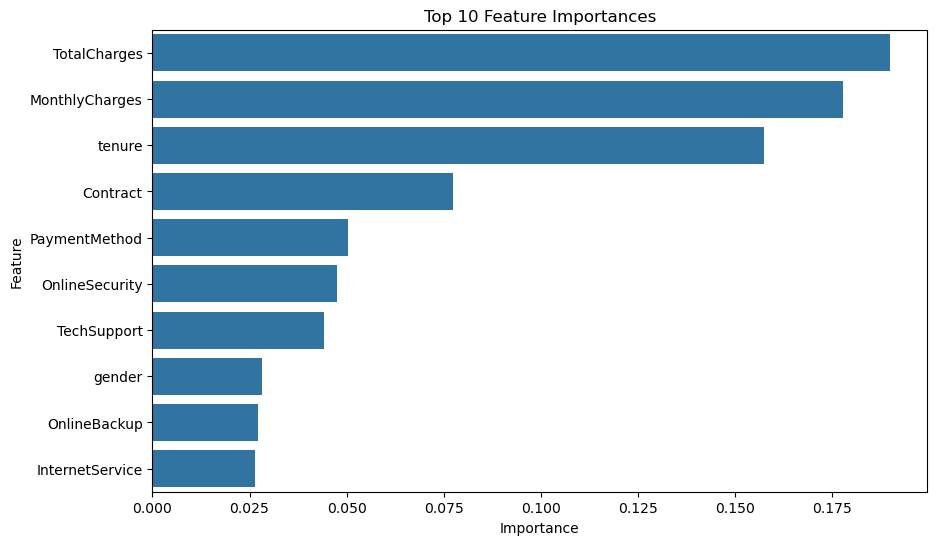

In [92]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [96]:
joblib.dump(model, "churn_model.pkl")

['churn_model.pkl']

In [98]:
model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=8,             # Limit depth of each tree
    random_state=42,
    class_weight='balanced'  # Useful for imbalanced data
)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [100]:
y_pred = model.predict(X_test)

In [106]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: ROC AUC score (especially useful for imbalanced datasets)
y_prob = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_score)

Accuracy: 0.7757274662881476

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.78      0.79      1409


Confusion Matrix:
 [[797 239]
 [ 77 296]]
ROC AUC Score: 0.8617090376473753


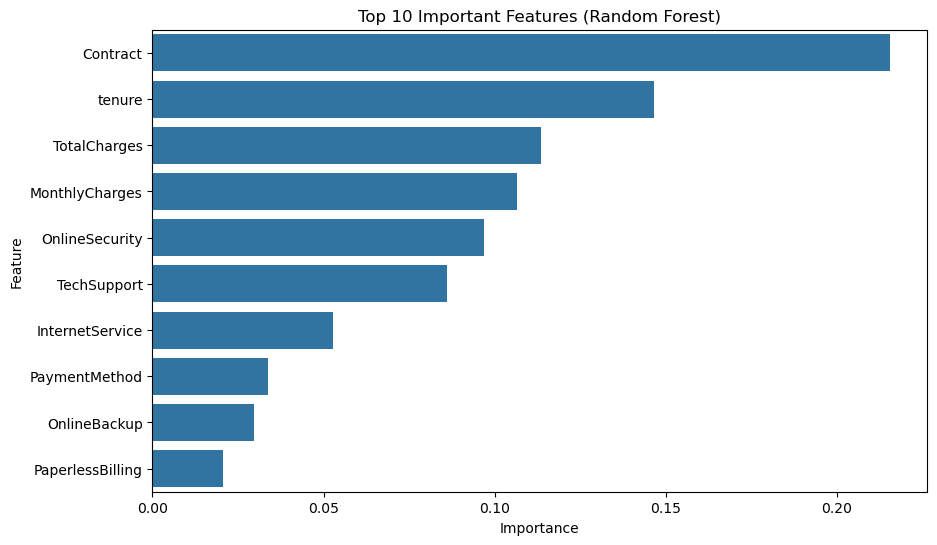

In [108]:
importances = model.feature_importances_
features = X.columns

# Create DataFrame for plotting
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

In [112]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [114]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'ROC AUC': round(roc, 4)
    })

results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
results_df

C:\Users\kurap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.8169,0.8615
1,Random Forest,0.8098,0.8605
4,Gradient Boosting,0.8055,0.8580
3,SVM,0.7353,0.8166
2,KNN,0.7771,0.7762


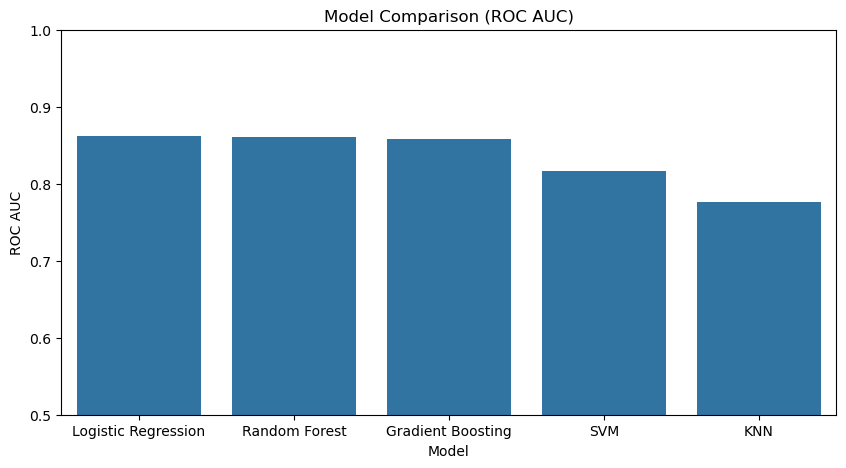

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='ROC AUC', data=results_df)
plt.title('Model Comparison (ROC AUC)')
plt.ylim(0.5, 1)
plt.show()

In [122]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [124]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,  # Use all cores
    verbose=1
)

In [126]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [127]:
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8097941802696949
Test ROC AUC: 0.8603155050876233

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
grid_search.fit(X_train, y_train)

In [130]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC Score: 0.8388856446895684


In [132]:
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8097941802696949
Test ROC AUC: 0.8603155050876233

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

